In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../dataset/syn_logs.csv")
df.shape

(2410, 5)

In [3]:
df

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert
...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert


In [4]:
df.drop(columns=["timestamp"], inplace=True)

In [5]:
sources = df["source"].unique()
sources

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI', 'LegacyCRM'], dtype=object)

In [6]:
labels = df["target_label"].unique()
labels

array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'System Notification', 'Resource Usage', 'User Action',
       'Workflow Error', 'Deprecation Warning'], dtype=object)

In [7]:
df[df["target_label"] == "HTTP Status"].sample(10)


,source,log_message,target_label,complexity
663,ModernHR,nova.osapi_compute.wsgi.server [req-048f93d6-3...,HTTP Status,bert
848,ModernHR,nova.osapi_compute.wsgi.server [req-50e6e570-f...,HTTP Status,bert
1480,AnalyticsEngine,nova.osapi_compute.wsgi.server [req-9c29c95b-a...,HTTP Status,bert
1742,ModernHR,nova.osapi_compute.wsgi.server [req-0482ad95-c...,HTTP Status,bert
473,ModernCRM,nova.osapi_compute.wsgi.server [req-6a27e91d-9...,HTTP Status,bert
2374,BillingSystem,nova.osapi_compute.wsgi.server [req-86058deb-b...,HTTP Status,bert
1264,ModernCRM,nova.osapi_compute.wsgi.server [req-79805ef8-d...,HTTP Status,bert
1210,ThirdPartyAPI,nova.metadata.wsgi.server [req-875ce34e-697a-4...,HTTP Status,bert
317,AnalyticsEngine,nova.osapi_compute.wsgi.server [req-707b6cbd-f...,HTTP Status,bert
1157,ThirdPartyAPI,nova.osapi_compute.wsgi.server [req-a70bb1f3-4...,HTTP Status,bert


In [8]:
df[df["log_message"].str.startswith("System reboot initiated by user")]


,source,log_message,target_label,complexity
36,BillingSystem,System reboot initiated by user User243.,System Notification,regex
92,BillingSystem,System reboot initiated by user User471.,System Notification,regex
139,ModernHR,System reboot initiated by user User216.,System Notification,regex
140,AnalyticsEngine,System reboot initiated by user User639.,System Notification,regex
161,BillingSystem,System reboot initiated by user User819.,System Notification,regex
163,BillingSystem,System reboot initiated by user User938.,System Notification,regex
307,BillingSystem,System reboot initiated by user User929.,System Notification,regex
365,ModernHR,System reboot initiated by user User533.,System Notification,regex
508,ThirdPartyAPI,System reboot initiated by user User591.,System Notification,regex
552,ModernHR,System reboot initiated by user User421.,System Notification,regex


## DBSCAN


In [9]:
df["target_label"].value_counts()

target_label
HTTP Status            1017
Security Alert          371
System Notification     356
Error                   177
Resource Usage          177
Critical Error          161
User Action             144
Workflow Error            4
Deprecation Warning       3
Name: count, dtype: int64

In [10]:
from sentence_transformers import SentenceTransformer

transformer = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = transformer.encode(df["log_message"].tolist())
embeddings.shape

/Users/sarveshmhadgut/Documents/MLOps/Vigilis/.venv/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


(2410, 384)

In [11]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.2, min_samples=5, metric="cosine")

labels = clustering.fit_predict(embeddings)
df["cluster_label"] = labels
df

,source,log_message,target_label,complexity,cluster_label
0,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0
1,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1
2,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,-1
3,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0
4,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0
...,...,...,...,...,...
2405,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,0
2406,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,6
2407,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,0
2408,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1


In [12]:
noise_ratio = (labels == -1).mean()
noise_ratio

np.float64(0.10622406639004149)

In [13]:
pd.Series(labels).value_counts().sort_index()


-1      256
 0     1017
 1       39
 2       57
 3       53
 4      147
 5       49
 6       60
 7       60
 8       44
 9       30
 10     100
 11       6
 12      86
 13      48
 14      46
 15      17
 16      43
 17      58
 18      13
 19      20
 20       7
 21      51
 22      10
 23      20
 24      20
 25      10
 26       6
 27       5
 28      11
 29       6
 30       9
 31       6
Name: count, dtype: int64

In [14]:
clusters = df.groupby("cluster_label")["log_message"].apply(list)

In [15]:
for cluster_id, messages in clusters.items():
    if cluster_id == -1:
        continue
    print(f"\nCluster {cluster_id} ({len(messages)} samples)")
    for msg in messages[:2]:
        if len(msg) > 100:
            print(f"\t{msg[:100]}...")
        else:
            print(f"\t{msg}")



Cluster 0 (1017 samples)
	nova.osapi_compute.wsgi.server [req-b9718cd8-f65e-49cc-8349-6cf7122af137 113d3a99c3da401fbd62cc2caa5...
	nova.osapi_compute.wsgi.server [req-4895c258-b2f8-488f-a2a3-4fae63982e48 113d3a99c3da401fbd62cc2caa5...

Cluster 1 (39 samples)
	Email service experiencing issues with sending
	Email server encountered a sending fault

Cluster 2 (57 samples)
	Shard 6 replication task ended in failure
	Data replication task for shard 14 did not complete

Cluster 3 (53 samples)
	File data_6169.csv uploaded successfully by user User953.
	File data_3847.csv uploaded successfully by user User175.

Cluster 4 (147 samples)
	nova.compute.claims [req-a07ac654-8e81-416d-bfbb-189116b07969 113d3a99c3da401fbd62cc2caa5b96d2 54fad...
	nova.compute.claims [req-d6986b54-3735-4a42-9074-0ba7d9717de9 113d3a99c3da401fbd62cc2caa5b96d2 54fad...

Cluster 5 (49 samples)
	Critical system unit error: unit ID Component55
	System component malfunction: component ID Component79

Cluster 6 (60 samples)


In [16]:
df[["log_message", "cluster_label"]].to_csv(
    "../dataset/clustered_logs.csv", index=False
)


In [17]:
cluster_representatives = df.groupby("cluster_label")["log_message"].first()
cluster_representatives

cluster_label
-1             Unauthorized access to data was attempted
 0     nova.osapi_compute.wsgi.server [req-b9718cd8-f...
 1        Email service experiencing issues with sending
 2             Shard 6 replication task ended in failure
 3     File data_6169.csv uploaded successfully by us...
 4     nova.compute.claims [req-a07ac654-8e81-416d-bf...
 5       Critical system unit error: unit ID Component55
 6     Multiple bad login attempts detected on user 8...
 7                        Backup completed successfully.
 8              Account with ID 5351 created by User634.
 9     nova.compute.resource_tracker [req-addc1839-2e...
 10                             User User685 logged out.
 11    Alert: brute force login attempt from 192.168....
 12               Backup started at 2025-05-14 07:06:55.
 13             System reboot initiated by user User243.
 14    Denied access attempt on restricted account Ac...
 15    Boot process terminated unexpectedly due to ke...
 16      User 766

## Regex


In [18]:
df[df["complexity"] == "regex"]["target_label"].unique()

array(['System Notification', 'User Action'], dtype=object)

In [19]:
import re


def regex_classification(log_message):
    REGEX_RULES = [
        (
            re.compile(r"^User User\d+ logged (in|out)\.$"),
            "USER_ACTION",
        ),
        (
            re.compile(r"^Account with ID \d+ created by User\d+\.$"),
            "USER_ACTION",
        ),
        (
            re.compile(r"^Backup started at \d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.$"),
            "SYSTEM_NOTIFICATION",
        ),
        (
            re.compile(r"^Backup ended at \d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.$"),
            "SYSTEM_NOTIFICATION",
        ),
        (
            re.compile(r"^Backup completed successfully\.$"),
            "SYSTEM_NOTIFICATION",
        ),
        (
            re.compile(r"^System updated to version \d+\.\d+\.\d+\.$"),
            "SYSTEM_NOTIFICATION",
        ),
        (
            re.compile(r"^File .+ uploaded successfully by user User\d+\.$"),
            "SYSTEM_NOTIFICATION",
        ),
        (
            re.compile(r"^Disk cleanup completed successfully\.$"),
            "SYSTEM_NOTIFICATION",
        ),
        (
            re.compile(r"^System reboot initiated by user User\d+\.$"),
            "SYSTEM_NOTIFICATION",
        ),
    ]

    for pattern, label in REGEX_RULES:
        if pattern.match(log_message):
            return label
    return None


In [20]:
regex_classification("User User685 logged out.")

'USER_ACTION'

In [21]:
regex_classification("System updated to version 3.9.1.")

'SYSTEM_NOTIFICATION'

In [22]:
df["regex_label"] = df["log_message"].apply(regex_classification)
len(df[df["complexity"] == "regex"])

500

In [23]:
len(df[df["regex_label"].notnull()])

500

## Non-regex


In [24]:
df[df["complexity"] != "regex"]["target_label"].unique()


array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'Resource Usage', 'Workflow Error', 'Deprecation Warning'],
      dtype=object)

In [25]:
non_regex_df = df[df["regex_label"].isnull()].iloc[:, :]
non_regex_df

,source,log_message,target_label,complexity,cluster_label,regex_label
0,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,-1,None
3,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0,None
...,...,...,...,...,...,...
2405,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,0,None
2406,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,6,None
2407,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,0,None
2408,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1,None


In [26]:
legacy_df = non_regex_df[non_regex_df["source"] == "LegacyCRM"]
legacy_df

,source,log_message,target_label,complexity,cluster_label,regex_label
60,LegacyCRM,Lead conversion failed for prospect ID 7842 du...,Workflow Error,llm,-1,None
255,LegacyCRM,API endpoint 'getCustomerDetails' is deprecate...,Deprecation Warning,llm,-1,None
377,LegacyCRM,Customer follow-up process for lead ID 5621 fa...,Workflow Error,llm,-1,None
1325,LegacyCRM,Escalation rule execution failed for ticket ID...,Workflow Error,llm,-1,None
1734,LegacyCRM,The 'ExportToCSV' feature is outdated. Please ...,Deprecation Warning,llm,-1,None
1826,LegacyCRM,Support for legacy authentication methods will...,Deprecation Warning,llm,-1,None
2217,LegacyCRM,Task assignment for TeamID 3425 could not comp...,Workflow Error,llm,-1,None


In [27]:
non_legacy_df = non_regex_df[non_regex_df["source"] != "LegacyCRM"].iloc[:, :]
non_legacy_df

,source,log_message,target_label,complexity,cluster_label,regex_label
0,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,-1,None
3,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0,None
...,...,...,...,...,...,...
2405,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,0,None
2406,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,6,None
2407,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,0,None
2408,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1,None


In [28]:
X = embeddings[non_legacy_df.index.values]
y = non_legacy_df["target_label"]

## LoR


In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1522, 384), (381, 384), (1522,), (381,))

In [32]:
X_train[0]

array([-1.05950058e-01,  5.20392098e-02, -2.57045180e-02,  4.01131483e-03,
       -2.75597014e-02, -1.67341426e-01, -4.46345843e-02, -4.75308821e-02,
        5.59380874e-02,  4.34339121e-02, -2.88834646e-02, -3.73322293e-02,
       -1.57388762e-01, -2.41458137e-02, -5.56563772e-02,  7.95450062e-03,
       -2.52156593e-02, -1.35504426e-02, -1.70674268e-02, -1.02262730e-02,
        2.98914816e-02,  9.07386765e-02,  5.96301034e-02,  1.97890271e-02,
        1.73126366e-02,  1.45166637e-02, -1.27852395e-01,  9.06584784e-02,
        3.00255828e-02, -1.44929746e-02,  6.92491755e-02,  2.54651457e-02,
       -9.73575041e-02,  7.27775022e-02,  7.87408743e-03,  7.83697814e-02,
        3.93391550e-02, -1.06230229e-01,  4.28407872e-03, -2.40979460e-03,
        1.49474606e-01,  2.86285579e-02, -6.46642502e-03,  3.61329243e-02,
       -2.29348484e-02, -8.13952927e-03, -1.70228612e-02, -6.67938963e-02,
        2.84353811e-02, -1.64712667e-02, -8.61853138e-02,  2.28379946e-03,
       -5.45341074e-02, -

In [33]:
y_encoded[:5]

array([2, 0, 4, 2, 2])

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

base_clf = LogisticRegression(
    class_weight="balanced",
    solver="lbfgs",
    max_iter=1000,
)

clf = CalibratedClassifierCV(
    base_clf,
    method="isotonic",
    cv=3,
)

clf.fit(X_train, y_train)


,"estimator estimator: estimator instance, default=NoneThe classifier whose output need to be calibrated to provide moreaccurate `predict_proba` outputs. The default classifier isa :class:`~sklearn.svm.LinearSVC`... versionadded:: 1.2",LogisticRegre...max_iter=1000)
,"method method: {'sigmoid', 'isotonic', 'temperature'}, default='sigmoid'The method to use for calibration. Can be:- 'sigmoid', which corresponds to Platt's method (i.e. a binary logistic regression model).- 'isotonic', which is a non-parametric approach.- 'temperature', temperature scaling.Sigmoid and isotonic calibration methods natively support only binaryclassifiers and extend to multi-class classification using a One-vs-Rest (OvR)strategy with post-hoc renormalization, i.e., adjusting the probabilities aftercalibration to ensure they sum up to 1.In contrast, temperature scaling naturally supports multi-class calibration byapplying `softmax(classifier_logits/T)` with a value of `T` (temperature)that optimizes the log loss.For very uncalibrated classifiers on very imbalanced datasets, sigmoidcalibration might be preferred because it fits an additional interceptparameter. This helps shift decision boundaries appropriately when theclassifier being calibrated is biased towards the majority class.Isotonic calibration is not recommended when the number of calibration samplesis too low ``(≪1000)`` since it then tends to overfit... versionchanged:: 1.8 Added option 'temperature'.",'isotonic'
,"cv cv: int, cross-validation generator, or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- integer, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if ``y`` is binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used. If ``y`` isneither binary nor multiclass, :class:`~sklearn.model_selection.KFold`is used.Refer to the :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors.Base estimator clones are fitted in parallel across cross-validationiterations.See :term:`Glossary ` for more details... versionadded:: 0.24",None
,"ensemble ensemble: bool, or ""auto"", default=""auto""Determines how the calibrator is fitted.""auto"" will use `False` if the `estimator` is a:class:`~sklearn.frozen.FrozenEstimator`, and `True` otherwise.If `True`, the `estimator` is fitted using training data, andcalibrated using testing data, for each `cv` fold. The final estimatoris an ensemble of `n_cv` fitted classifier and calibrator pairs, where`n_cv` is the number of cross-validation folds. The output is theaverage predicted probabilities of all pairs.If `False`, `cv` is used to compute unbiased predictions, via:func:`~sklearn.model_selection.cross_val_predict`, which are thenused for calibration. At prediction time, the classifier used is the`estimator` trained on all the data.Note that this method is also internally implemented in:mod:`sklearn.svm` estimators with the `probabilities=True` parameter... versionadded:: 0.24.. versionchanged:: 1.6 `""auto""` option is added and is the default.",'auto'
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. depre

In [35]:
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00       204
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        74

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381



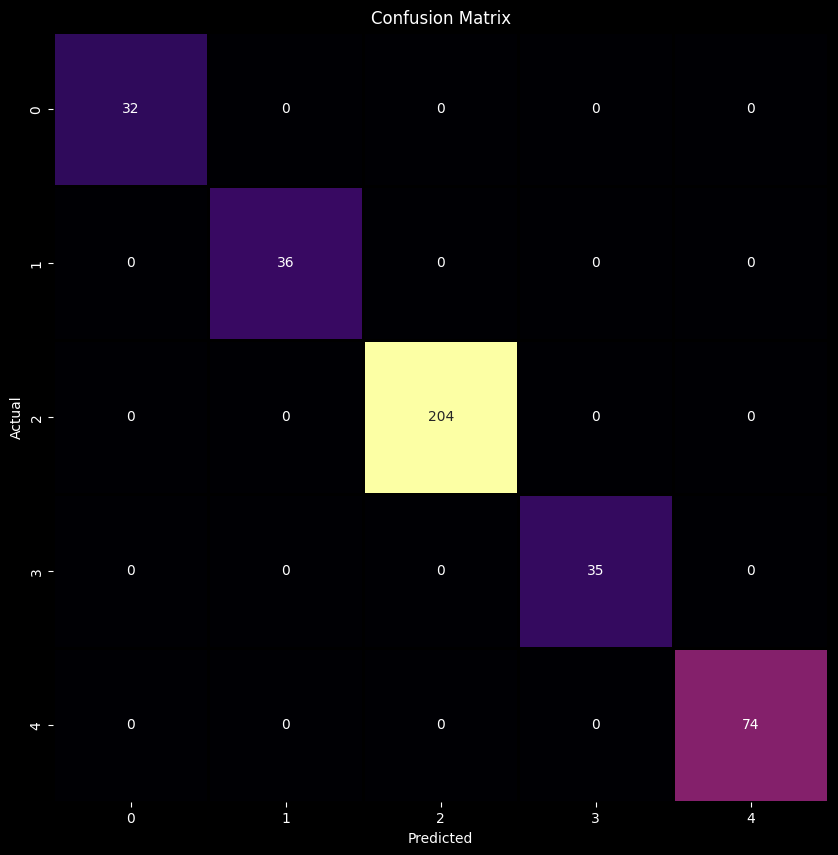

In [37]:
cm = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(10, 10))
sns.heatmap(
    cm, cbar=False, annot=True, fmt="d", cmap="inferno", linecolor="black", linewidths=2
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Dump model


In [38]:
import pickle
import os

os.makedirs("../models", exist_ok=True)
pickle.dump(clf, open("../models/model.pkl", "wb"))
